In [4]:
import pandas as pd

#import the dataset
data = pd.read_csv('data.csv', header=None, names=['Text'])

#first 5 rows
print(data.head())

#info
print(data.info())

#shape of dataset
data.shape


                                                Text
0                    Lord God and angels is with you
1  Blessings to you iv been through this myself h...
2  I was stage 4 small cell (and there is no stag...
3                            How is Delia doing now?
4                                    GET WELL SOON 😁
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2157 non-null   object
dtypes: object(1)
memory usage: 17.0+ KB
None


(2157, 1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re
import nltk
from nltk.corpus import stopwords

#import the stopwords from nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) | set(stopwords.words('french'))

#Function to clean the dataset

def clean_data(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()

    text = re.sub(r'\s+[a-zA]\s+', ' ', text)
    
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    text = re.sub(r'^b\s+', '', text)
   
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


data['Text'] = data['Text'].apply(clean_data)


# Saving the cleaned data back to a new CSV file
cleaned_data_path = 'bzghuzdata.csv'
data.to_csv(cleaned_data_path, index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
import pandas as pd
import string

# Load the data
data_path = "bzghuzdata.csv"
data = pd.read_csv(data_path)

def safe_preprocess_tokenize(text):

    if isinstance(text, str):
        
        text = text.lower()
        
        table = str.maketrans('', '', string.punctuation)
        text = text.translate(table)
        
        words = text.split()
        
        words = [word for word in words if 2 <= len(word) <= 15]
        return words
    else:
        # Return an empty list if text is not a string
        return []

data['Tokenized'] = data['Text'].apply(safe_preprocess_tokenize)

# Optionally save the processed data to a new CSV file
data.to_csv("TOKENSSSSS.csv", index=False)

# Display the processed data
print(data.head())

                                                Text  \
0                                    lord god angels   
1  blessings iv hated needles young strong im for...   
2  stage 4 small cell stage 5 3 1 2 years took 16...   
3                                              delia   
4                                      get well soon   

                                           Tokenized  
0                                [lord, god, angels]  
1  [blessings, iv, hated, needles, young, strong,...  
2  [stage, small, cell, stage, years, took, 16, c...  
3                                            [delia]  
4                                  [get, well, soon]  


In [13]:
# Joining tokens correctly before analysis
sample_text = " ".join(data['Tokenized'].iloc[355])  # Join tokens back into a string
print("Text being analyzed:", sample_text)



Text being analyzed: thank sharing found channel subscribed dearest friend going stage bone cancer started breast currently going chemo feel helpless want family cv restrictions vlog helping understand karen going thank best wishes many hugs sent


In [14]:
# Analyze a different entry
sample_text = " ".join(data['Tokenized'].iloc[355])  # Adjust the index to check different rows
blob = TextBlob(sample_text)
sentiment = blob.sentiment
print(f"Sentiment Polarity: {sentiment.polarity} - Sentiment Subjectivity: {sentiment.subjectivity}")


Sentiment Polarity: 0.5 - Sentiment Subjectivity: 0.39999999999999997


In [16]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure that NLTK and the vader_lexicon resource are available
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Example: Using the first tokenized text, join it back into a single string
sample_text = " ".join(data['Tokenized'].iloc[0])

# Get sentiment scores
scores = sia.polarity_scores(sample_text)

# Output the scores
print(scores)



{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


In [17]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Load your data
data_path = "TOKENSSSSS.csv"  # Change to your actual data file path
data = pd.read_csv(data_path)



# Ensure NLTK resources are downloaded
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores for a list of tokens
def get_sentiment_scores(tokens):
    # Join tokens into a single string
    text = " ".join(tokens)
    # Get sentiment scores
    return sia.polarity_scores(text)

# Apply the function to each row in the dataframe
data['Sentiment Scores'] = data['Tokenized'].apply(get_sentiment_scores)

# Show the updated dataframe
print(data.head())

# Optionally, save the results to a new CSV file
data.to_csv("path_to_your_output_with_sentiments.csv", index=False)


                                                Text  \
0                                    lord god angels   
1  blessings iv hated needles young strong im for...   
2  stage 4 small cell stage 5 3 1 2 years took 16...   
3                                              delia   
4                                      get well soon   

                                           Tokenized  \
0                          ['lord', 'god', 'angels']   
1  ['blessings', 'iv', 'hated', 'needles', 'young...   
2  ['stage', 'small', 'cell', 'stage', 'years', '...   
3                                          ['delia']   
4                            ['get', 'well', 'soon']   

                                    Sentiment Scores  
0  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...  
1  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...  
2  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...  
4  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
# Print sample texts to check their format
for i in range(5):
    sample_text = " ".join(data['Tokenized'].iloc[i])
    print(f"Sample {i+1}: {sample_text}")


Sample 1: [ ' l o r d ' ,   ' g o d ' ,   ' a n g e l s ' ]
Sample 2: [ ' b l e s s i n g s ' ,   ' i v ' ,   ' h a t e d ' ,   ' n e e d l e s ' ,   ' y o u n g ' ,   ' s t r o n g ' ,   ' i m ' ,   ' f o r t y s ' ,   ' b e s t ' ,   ' t h i n g ' ,   ' p o s i t i v e ' ,   ' g o t ' ]
Sample 3: [ ' s t a g e ' ,   ' s m a l l ' ,   ' c e l l ' ,   ' s t a g e ' ,   ' y e a r s ' ,   ' t o o k ' ,   ' 1 6 ' ,   ' c h e m o ' ,   ' 5 2 ' ,   ' i m m u n e ' ,   ' t h e r a p i e s ' ,   ' r e a s o n ' ,   ' s t o p p e d ' ,   ' h a n d s ' ,   ' f e e t ' ,   ' b r o k e ' ,   ' l o o k ' ,   ' l i k e ' ,   ' b u r n e d ' ,   ' l i v e d ' ,   ' m o n t h s ' ,   ' p o p c o r n ' ,   ' t o d a y ' ,   ' 2 3 0 ' ,   ' p o u n d s ' ,   ' e a t i n g ' ,   ' m e x i c a n ' ,   ' f o o d ' ,   ' c a n c e r ' ,   ' d e m o n ' ,   ' u s e d ' ,   ' m u c h ' ,   ' p r a y e r ' ,   ' c a r i n g ' ,   ' w i f e ' ,   ' g o o d ' ,   ' o n c o l o g i s t ' ,   ' h e a l i n g ' , 

In [21]:
# Test with clearly positive and negative sentences
test_texts = ["stay strong dear delia alright soon loves prayers"]
for text in test_texts:
    scores = sia.polarity_scores(text)
    print(f"Text: {text}, Scores: {scores}")


Text: stay strong dear delia alright soon loves prayers, Scores: {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.891}


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from ast import literal_eval

# Load your data
data_path = "TOKENSSSSS.csv"  
data = pd.read_csv(data_path)

# If your tokens are in string form, convert them back to lists
data['Tokenized'] = data['Tokenized'].apply(literal_eval)

# Join tokens back into sentences
data['Processed_Text'] = data['Tokenized'].apply(lambda tokens: ' '.join(tokens))

# Initialize TF-IDF Vectorizer with adjusted parameters
vectorizer = TfidfVectorizer(min_df=1)

# Try fitting and transforming the processed text
try:
    tfidf_matrix = vectorizer.fit_transform(data['Processed_Text'])
    # Output the TF-IDF matrix
    print(tfidf_matrix)
    # For a better understanding, convert the TF-IDF matrix to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    # Print the DataFrame to see the TF-IDF values
    print(tfidf_df.head())
except ValueError as e:
    print(f"Error: {e}")



data.to_csv("TF-IDF.csv", index=False)


  (0, 336)	0.7568166760897679
  (0, 1820)	0.3150492758945552
  (0, 2517)	0.57268880952115
  (1, 1840)	0.1861109928688174
  (1, 3220)	0.22643010264606853
  (1, 4232)	0.2645525154605781
  (1, 567)	0.21415205216649985
  (1, 1701)	0.4146786366697927
  (1, 2143)	0.2950821979691302
  (1, 4002)	0.13961365661219594
  (1, 4763)	0.25070380312516266
  (1, 2863)	0.3936187492004174
  (1, 1951)	0.3576166337769294
  (1, 2262)	0.31745709424310564
  (1, 609)	0.27067017497584067
  (2, 2488)	0.12323940027863295
  (2, 2984)	0.15846403497624817
  (2, 2530)	0.14439326825342133
  (2, 1623)	0.11510294427787043
  (2, 3927)	0.14439326825342133
  (2, 1968)	0.10298244621100133
  (2, 2980)	0.1728385995331208
  (2, 1832)	0.09909245370486913
  (2, 4661)	0.15142865161483476
  (2, 777)	0.16837985090077365
  :	:
  (2150, 1798)	0.8308722001983097
  (2150, 4002)	0.5564632844470695
  (2151, 3374)	0.608234786815289
  (2151, 1645)	0.6322351732250495
  (2151, 3959)	0.32242384643013633
  (2151, 3256)	0.2758338596998287
  (215

In [6]:
import pandas as pd
from textblob import TextBlob

# Load your CSV file
tokens_df = pd.read_csv('TOKENSSSSS.csv')

# Ensure all entries in the 'Text' column are treated as strings
tokens_df['Text'] = tokens_df['Text'].astype(str)

# Function to apply sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis to the 'Text' column
tokens_df['Sentiment'] = tokens_df['Text'].apply(lambda x: analyze_sentiment(x))

# Display the updated dataframe with sentiment scores
tokens_df.head()

tokens_df.to_csv("TBlob.csv", index=False)




In [10]:
# Calculate the average polarity and subjectivity
average_polarity = tokens_df['Sentiment'].apply(lambda x: x[0]).mean()
average_subjectivity = tokens_df['Sentiment'].apply(lambda x: x[1]).mean()

print("Average Polarity:", average_polarity)
print("Average Subjectivity:", average_subjectivity)



Average Polarity: 0.24192671772332713
Average Subjectivity: 0.4393290222157277


Matplotlib is building the font cache; this may take a moment.


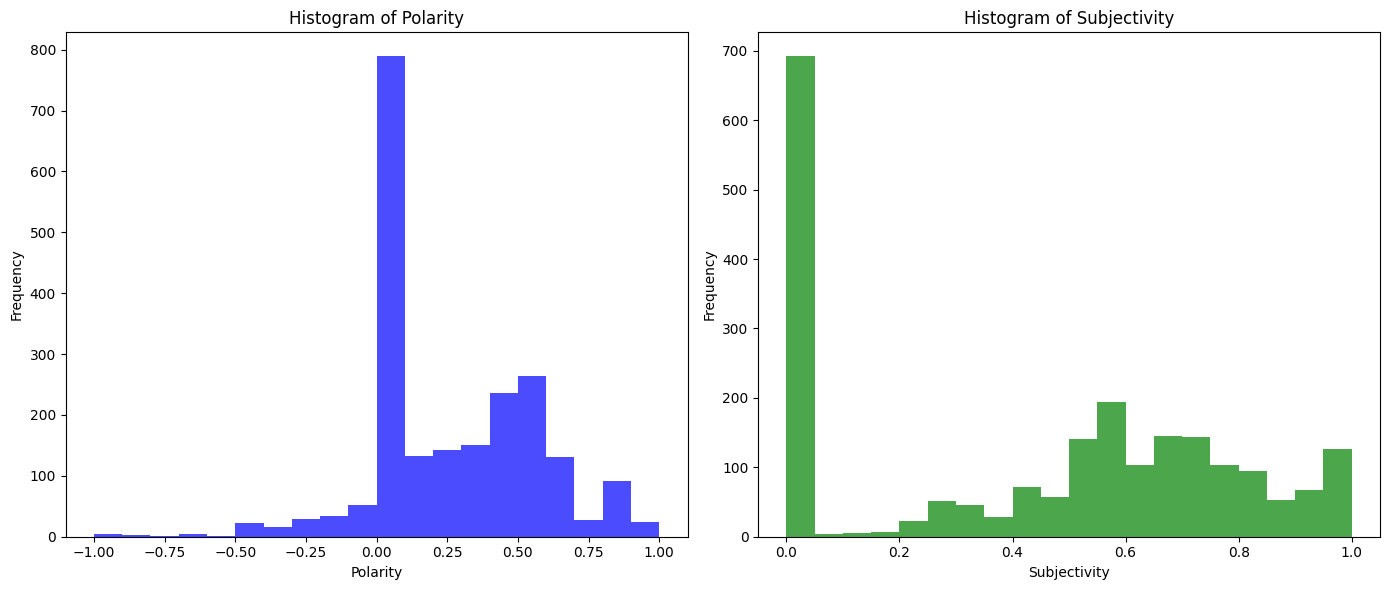

In [11]:
import matplotlib.pyplot as plt

# Extract polarity and subjectivity into separate columns for easier plotting
tokens_df['Polarity'] = tokens_df['Sentiment'].apply(lambda x: x[0])
tokens_df['Subjectivity'] = tokens_df['Sentiment'].apply(lambda x: x[1])

# Plotting
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(tokens_df['Polarity'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(tokens_df['Subjectivity'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer


#initialize vader
sia = SentimentIntensityAnalyzer()

#function to get vvader coumpind score
def get_vader_sentiment(text):
    return sia.polarity_scores(text)['compound']

#apply vaer sentiment analysuis
tokens_df['VADER Sentiment'] = tokens_df['Text'].apply(get_vader_sentiment)

#display
tokens_df.head(50)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Text,Tokenized,Sentiment,Predicted Sentiment,Polarity,Subjectivity,VADER Sentiment
0,lord god angels,"['lord', 'god', 'angels']","(0.0, 0.0)",neutral,0.000000,0.000000,0.2732
1,blessings iv hated needles young strong im for...,"['blessings', 'iv', 'hated', 'needles', 'young...","(0.17212121212121212, 0.5357575757575758)",positive,0.172121,0.535758,0.8860
2,stage 4 small cell stage 5 3 1 2 years took 16...,"['stage', 'small', 'cell', 'stage', 'years', '...","(0.2477272727272727, 0.4166666666666667)",positive,0.247727,0.416667,0.5719
3,delia,['delia'],"(0.0, 0.0)",neutral,0.000000,0.000000,0.0000
4,get well soon,"['get', 'well', 'soon']","(0.0, 0.0)",neutral,0.000000,0.000000,0.2732
5,get well soon,"['get', 'well', 'soon']","(0.0, 0.0)",neutral,0.000000,0.000000,0.2732
6,please ead fine father strong man surgery colo...,"['please', 'ead', 'fine', 'father', 'strong', ...","(0.18356643356643357, 0.4390248640248639)",positive,0.183566,0.439025,-0.9914
7,delia ask type cancer,"['delia', 'ask', 'type', 'cancer']","(0.0, 0.0)",neutral,0.000000,0.000000,-0.6597
8,got bowl cancer redoaion painful sad happy go ...,"['got', 'bowl', 'cancer', 'redoaion', 'painful...","(-0.01666666666666665, 0.9333333333333333)",negative,-0.016667,0.933333,-0.5994
9,done well hours,"['done', 'well', 'hours']","(0.0, 0.0)",neutral,0.000000,0.000000,0.2732


In [14]:
# Function to classify sentiment based on adjusted thresholds
def classify_sentiment(score):
    if score > 0.1:  # Adjust this threshold as per your analysis
        return 'positive'
    elif score < -0.1:  # Adjust this threshold as per your analysis
        return 'negative'
    else:
        return 'neutral'

# Apply the classification
tokens_df['Sentiment Class'] = tokens_df['VADER Sentiment'].apply(classify_sentiment)

# Display the updated DataFrame
tokens_df.head()


,Text,Tokenized,Sentiment,Predicted Sentiment,Polarity,Subjectivity,VADER Sentiment,Sentiment Class
0,lord god angels,"['lord', 'god', 'angels']","(0.0, 0.0)",neutral,0.000000,0.000000,0.2732,positive
1,blessings iv hated needles young strong im for...,"['blessings', 'iv', 'hated', 'needles', 'young...","(0.17212121212121212, 0.5357575757575758)",positive,0.172121,0.535758,0.8860,positive
2,stage 4 small cell stage 5 3 1 2 years took 16...,"['stage', 'small', 'cell', 'stage', 'years', '...","(0.2477272727272727, 0.4166666666666667)",positive,0.247727,0.416667,0.5719,positive
3,delia,['delia'],"(0.0, 0.0)",neutral,0.000000,0.000000,0.0000,neutral
4,get well soon,"['get', 'well', 'soon']","(0.0, 0.0)",neutral,0.000000,0.000000,0.2732,positive


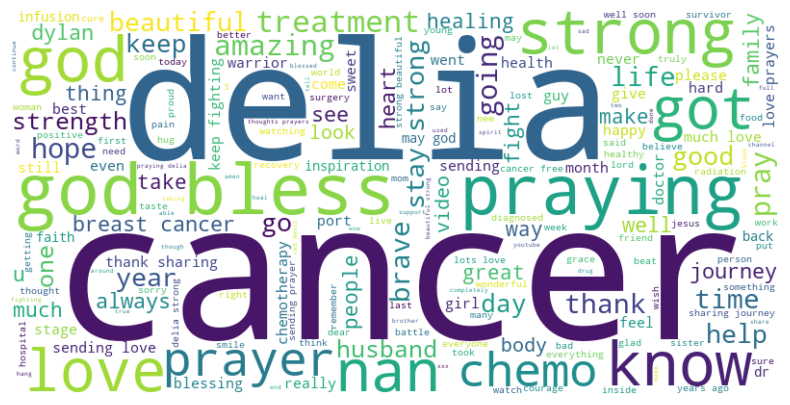

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#combine all text 
text_combined = ' '.join(tokens_df['Text'].astype(str))

#create a wordcloud
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text_combined)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split


# Extracting features and target
X = tokens_df['Text'] 
y = tokens_df['Sentiment'].apply(lambda x: x[0])  

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Display the size of each set
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))


Training set size: 1725
Test set size: 432


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Create a text processing and regression model pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('reg', RandomForestRegressor()), 
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test data:", mse)



Mean Squared Error on test data: 0.025446897884739743


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)


MSE: 0.025446897884739743
RMSE: 0.15952083840282355
MAE: 0.09179805190122188
R^2: 0.7178342088035341


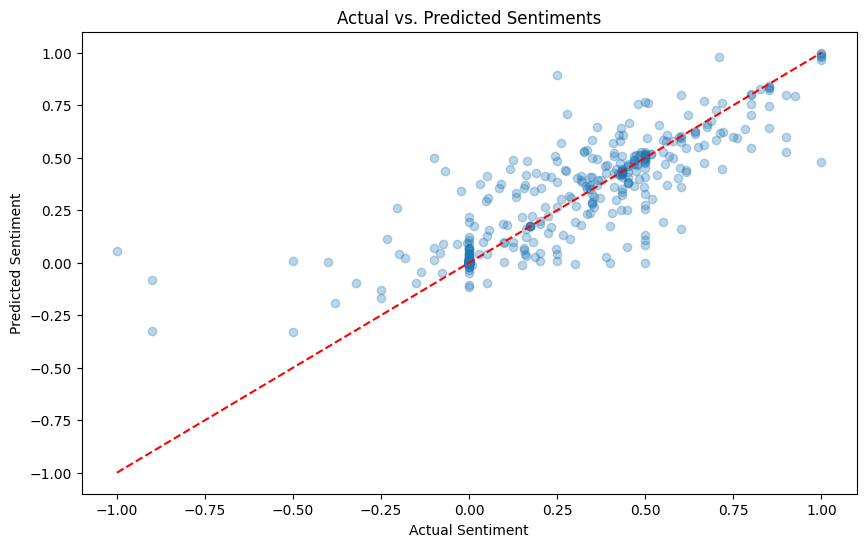

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([-1, 1], [-1, 1], '--', color='red')  
plt.title('Actual vs. Predicted Sentiments')
plt.xlabel('Actual Sentiment')
plt.ylabel('Predicted Sentiment')
plt.show()


In [21]:
def classify_detailed_sentiment(polarity):
    if polarity > 0.66:
        return 'Highly Positive'
    elif polarity > 0.33:
        return 'Moderately Positive'
    elif polarity > 0:
        return 'Slightly Positive'
    elif polarity > -0.33:
        return 'Slightly Negative'
    elif polarity > -0.66:
        return 'Moderately Negative'
    else:
        return 'Highly Negative'

# Apply the classification function to create detailed sentiment labels
tokens_df['Detailed Sentiment'] = tokens_df['Sentiment'].apply(lambda x: classify_detailed_sentiment(x[0]))


In [23]:
from sklearn.model_selection import train_test_split

X = tokens_df['Text']
y = tokens_df['Detailed Sentiment']
              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of each set
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 1725
Test set size: 432


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

    Highly Negative       0.00      0.00      0.00         3
    Highly Positive       0.71      0.63      0.67        38
Moderately Negative       0.00      0.00      0.00         4
Moderately Positive       0.71      0.86      0.78       146
  Slightly Negative       0.76      0.92      0.83       155
  Slightly Positive       0.69      0.29      0.41        86

           accuracy                           0.73       432
          macro avg       0.48      0.45      0.45       432
       weighted avg       0.71      0.73      0.70       432



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


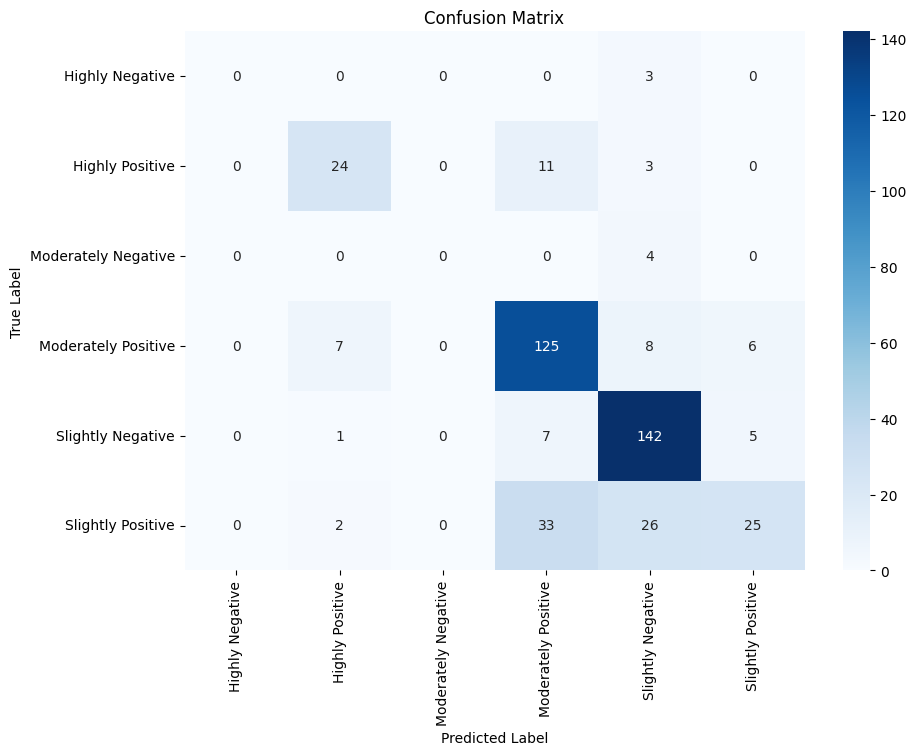

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
